In [298]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [299]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import date, timedelta
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5)

/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'CODE', 'Unnamed: 0.1', 'DATE', 'MC', 'MH', 'ML', 'MO',
       'NC', 'NET_CHANGE', 'NH', 'NL', 'NO', 'SQ', 'UNIT', 'VALUE', 'VOLUME',
       'VWAP', 'SQTYPE', 'PREVIOUS_DAY', 'NEXT_DAY', 'MO_NEXTDAY',
       'MH_NEXTDAY', 'MC_NEXTDAY', 'ML_NEXTDAY', 'NO_NEXTDAY', 'NL_NEXTDAY',
       'NC_NEXTDAY', 'NH_NEXTDAY', 'NC_LASTDAY', 'DAILY_LIMIT', 'LIMIT_UP',
       'LIMIT_DOWN', 'OPEN_LU', 'OPEN_LD', 'MORNING_LU', 'MORNING_LD',
       'NIGHT_LU', 'NIGHT_LD', 'VALUE_AUD_MEAN', 'SUM_LIMIT', 'LIMIT_CLASS',
       'LIMIT_U', 'LIMIT_D', 'LIMIT_STATUS', 'DELTA_OPEN', 'DELTA_CLOSE',
       'DELTA_OPEN_CLASS', 'DELTA_CLOSE_CLASS', 'APP_LIMIT', 'DELTA_OPEN_P',
       'DELTA_CLOSE_P'],
      dtype='object')


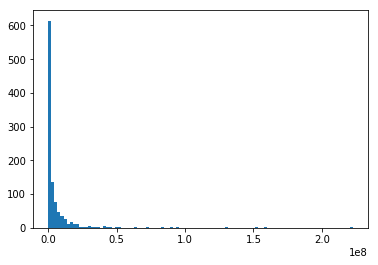

In [301]:
my_data=pd.read_csv('RefinedData.csv')
date_list=sorted(my_data['DATE'].unique())
len_first=len(my_data)
av_val=my_data['VALUE_AUD_MEAN'].mean()
my_data=my_data[my_data['SUM_LIMIT']>0]
len_end=len(my_data)
print(my_data.columns)
plt.hist(my_data['VALUE_AUD_MEAN'].unique(),bins=100)
plt.show()

## Frequency Stats
Data Period 2018 Full Year - All Stocks With 100 Trading Unit

In [302]:
print('NUMBER of TOTAL OBSERVATIONS:',len_first)
print('NUMBER of LIMIT EVENTS: ',len_end)
print('% of LIMIT EVENTS: ',len_end/len_first)

NUMBER of TOTAL OBSERVATIONS: 787248
NUMBER of LIMIT EVENTS:  2589
% of LIMIT EVENTS:  0.0032886714224742396


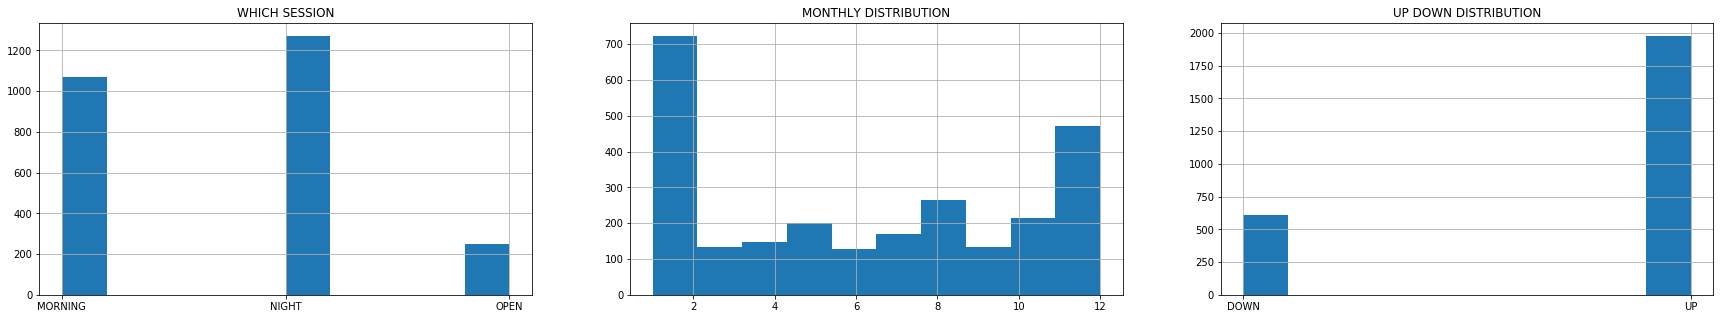

AVERAGE DAILY AUD VOLUME ALL DATA: 10771357.137352733
AVERAGE DAILY AUD VOLUME EVENTS: 6095323.233285524
% of LIMIT EVENTS:  0.5658825675873529


In [303]:
plt.figure(figsize=(30,5))
# NIGHT MEANS EVENING SESSION

plt.subplot(131)
plt.title("WHICH SESSION")
my_data['LIMIT_CLASS'].hist()


#months
plt.subplot(132)
plt.title("MONTHLY DISTRIBUTION")
my_data['DATE']=pd.to_datetime(my_data['DATE'])
my_data['MONTH']=my_data['DATE'].dt.month
my_data['MONTH'].hist()

#up_down
plt.subplot(133)
plt.title("UP DOWN DISTRIBUTION")
my_data['LIMIT_STATUS'].hist()
plt.show()

print('AVERAGE DAILY AUD VOLUME ALL DATA:',av_val)
print('AVERAGE DAILY AUD VOLUME EVENTS:',my_data['VALUE_AUD_MEAN'].mean())
print('% of LIMIT EVENTS: ',my_data['VALUE_AUD_MEAN'].mean()/av_val)

# Result Matrix
Data Period 2018 Full Year - All Stocks With 100 Trading Unit

In [304]:
print("NEXT DAY DELTA CLOSE vs LIMIT PRICE")
print("COUNT")
df = my_data.groupby(['LIMIT_STATUS','DELTA_CLOSE_CLASS']).size().unstack(fill_value=0)
display(df)
print("MEAN RETURN")
df = my_data.groupby(['LIMIT_STATUS','DELTA_CLOSE_CLASS'])['DELTA_CLOSE_P'].mean().unstack(fill_value=0)*100
display(df)
print("")
print("")
print("")
print("NEXT DAY DELTA OPEN vs LIMIT PRICE")
print("COUNT")
df = my_data.groupby(['LIMIT_STATUS','DELTA_OPEN_CLASS']).size().unstack(fill_value=0)
display(df)
print("MEAN RETURN")
df = my_data.groupby(['LIMIT_STATUS','DELTA_OPEN_CLASS'])['DELTA_CLOSE_P'].mean().unstack(fill_value=0)*100
display(df)


NEXT DAY DELTA CLOSE vs LIMIT PRICE
COUNT


DELTA_CLOSE_CLASS  DownTick  NoChange  UpTick
LIMIT_STATUS                                 
DOWN                    315         3     294
UP                     1078         9     890

MEAN RETURN


DELTA_CLOSE_CLASS  DownTick  NoChange   UpTick
LIMIT_STATUS                                  
DOWN               -9.24048   0.00000  6.37581
UP                 -8.09913   0.00000 10.65739




NEXT DAY DELTA OPEN vs LIMIT PRICE
COUNT


DELTA_OPEN_CLASS    0  DownTick  NoChange  UpTick
LIMIT_STATUS                                     
DOWN               20       252        13     327
UP                117       938        47     875

MEAN RETURN


DELTA_OPEN_CLASS         0  DownTick  NoChange  UpTick
LIMIT_STATUS                                          
DOWN             -23.40557  -7.27641  -1.74136 3.93928
UP                18.63901  -6.42169  -1.17604 5.31688

Above stats are meaningless because power comes from consequituve limit ups. Also we don't know how 

##  Backtest

In [ ]:
# If a stock goes limit up, buys the stock from limit price , if next day is not a limit up, tha sells it at next day close, if next day is limit down than wait for that day and exit at next day close.

In [ ]:




stocks=my_data['CODE'].unique()
trade_list=[]
for stock in stocks:
    dataframe=my_data[my_data['CODE']==stock ]
    dates=sorted(dataframe['DATE'].unique())
    status=0
    buy_price=0
    sell_price=0
    entry_date=0
    exit_date=0
    for date in date_list:
        if str(date) in list(dataframe['DATE'].astype(str)):
            current_slice=dataframe[dataframe['DATE']==date]
            if status==0 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                buy_price=current_slice['LIMIT_UP'].iloc[0]
                status=1
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                entry_date=date
            elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                #we wait
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
            elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='DOWN':
                # we exit with next day close price
                exit_date=date
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                trade_list.append([stock,entry_date,exit_date,buy_price,sell_price])
                entry_date=0
                exit_date=0
                buy_price=0
                sell_price=0
                status=0
        else:
            if status==1:
                exit_date=date
                trade_list.append([stock,entry_date,exit_date,buy_price,sell_price])
                entry_date=0
                exit_date=0
                buy_price=0
                sell_price=0
                status=0
        
                #trade is finalized
plt.figure(figsize=(30,10)) 


return_frame=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])
return_frame=return_frame.set_index(['ENTRY_DATE'])
return_frame['RETURN']=(return_frame['EXIT_PRICE']-return_frame['ENTRY_PRICE'])/return_frame['ENTRY_PRICE']
return_frame.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
plt.show()   

## Histogram of Returns

In [ ]:
plt.figure(figsize=(30,10)) 
return_frame['RETURN'].hist(bins=250)
plt.show()

# Backtest with Returns, 2 STDEV+- EXCLUDED  

In [ ]:
plt.figure(figsize=(30,10)) 
return_frame_2=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])


return_frame_2['RETURN']=(return_frame_2['EXIT_PRICE']-return_frame_2['ENTRY_PRICE'])/return_frame_2['ENTRY_PRICE']
stdev_return=return_frame_2['RETURN'].std()
print("STDDEV:",stdev_return)
print("MEAN:",return_frame_2['RETURN'].mean())
FILTER=2

return_frame_2=return_frame_2[(return_frame_2['RETURN']<FILTER*stdev_return)]
return_frame_2=return_frame_2[(return_frame_2['RETURN']>-1*FILTER*stdev_return)]

print(len(return_frame))
print(len(return_frame_2))
return_frame_2.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
plt.show()   

return_frame_2['ENTRY_DATE']=pd.to_datetime(return_frame_2['ENTRY_DATE'])
return_frame_2['EXIT_DATE']=pd.to_datetime(return_frame_2['EXIT_DATE'])
days_between=[]
for x in range(len(return_frame_2)):
    my_slice=return_frame_2.iloc[x,:]
    d1=my_slice['ENTRY_DATE']
    d2=my_slice['EXIT_DATE']
    delta = d2 - d1         # timedelta
    ii=0
    for i in range(delta.days + 1):
        my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

        if my_day in date_list:
            ii+=1
    days_between.append(ii-1)
return_frame_2['CONSEQ_EVENTS']=days_between
return_frame_2['CONSEQ_EVENTS'].hist(bins=10)
plt.show()

In [ ]:


return_frame_3=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])
return_frame_3['RETURN']=(return_frame_3['EXIT_PRICE']-return_frame_3['ENTRY_PRICE'])/return_frame_3['ENTRY_PRICE']
stdev_return=return_frame_3['RETURN'].std()
print("STDDEV:",stdev_return)
print("MEAN:",return_frame_3['RETURN'].mean())
FILTER=2
return_frame_3_a=return_frame_3.copy()
return_frame_3_b=return_frame_3.copy()

return_frame_3_a=return_frame_3_a[(return_frame_3_a['RETURN']>=FILTER*stdev_return)]
return_frame_3_b=return_frame_3_b[(return_frame_3_b['RETURN']<=-1*FILTER*stdev_return)]
return_frame_4=pd.concat([return_frame_3_a,return_frame_3_b])


return_frame_4['ENTRY_DATE']=pd.to_datetime(return_frame_4['ENTRY_DATE'])
return_frame_4['EXIT_DATE']=pd.to_datetime(return_frame_4['EXIT_DATE'])
days_between=[]
for x in range(len(return_frame_4)):
    my_slice=return_frame_4.iloc[x,:]
    d1=my_slice['ENTRY_DATE']
    d2=my_slice['EXIT_DATE']
    delta = d2 - d1         # timedelta
    ii=0
    for i in range(delta.days + 1):
        my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

        if my_day in date_list:
            ii+=1
    days_between.append(ii-1)
return_frame_4['CONSEQ_EVENTS']=days_between
return_frame_4['CONSEQ_EVENTS'].hist(bins=100)
plt.show()

# Monte Carlo



In [ ]:
plt.figure(figsize=(30,10)) 
final_frame=pd.DataFrame()
for z in range(10000):
    monte_list=[]
    for x in range(my_range):
        data_point=trade_list[np.random.randint(0,my_range)]
        monte_list.append(data_point)
    my_frame=pd.DataFrame(monte_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])
    my_frame['RETURN']=(my_frame['EXIT_PRICE']-my_frame['ENTRY_PRICE'])/my_frame['ENTRY_PRICE']
    monte_data=my_frame.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum()
    monte_data.plot()
    final_frame[str(z)]=monte_data.reset_index()['RETURN']
plt.title("MONTE CARLO PATHS")
plt.show()




In [ ]:
plt.figure(figsize=(30,10)) 
plt.title("MEAN MONTE CARLO")
plt.plot(final_frame.mean(axis=1),label='MEAN MONTECARLO CURVE')
return_frame.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot(label='REAL EQUITY CURVE')
plt.legend()
plt.show()

In [ ]:
STD_FILTER=0.5

thold=np.std(my_data['VALUE_AUD_MEAN'].unique())*STD_FILTER+np.mean(my_data['VALUE_AUD_MEAN'].unique())

my_data_n=my_data.copy()
my_data_n=my_data_n[my_data_n['VALUE_AUD_MEAN']>thold]

stocks=my_data_n['CODE'].unique()
trade_list=[]
for stock in stocks:
    dataframe=my_data_n[my_data_n['CODE']==stock ]
    dates=sorted(dataframe['DATE'].unique())
    status=0
    buy_price=0
    sell_price=0
    entry_date=0
    exit_date=0
    for date in date_list:
        if str(date) in list(dataframe['DATE'].astype(str)):
            current_slice=dataframe[dataframe['DATE']==date]
            if status==0 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                buy_price=current_slice['LIMIT_UP'].iloc[0]
                status=1
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                entry_date=date
            elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='UP':
                #we wait
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
            elif status==1 and current_slice['LIMIT_STATUS'].iloc[0]=='DOWN':
                # we exit with next day close price
                exit_date=date
                sell_price=current_slice['NC_NEXTDAY'].iloc[0]
                trade_list.append([stock,entry_date,exit_date,buy_price,sell_price])
                entry_date=0
                exit_date=0
                buy_price=0
                sell_price=0
                status=0
        else:
            if status==1:
                exit_date=date
                trade_list.append([stock,entry_date,exit_date,buy_price,sell_price])
                entry_date=0
                exit_date=0
                buy_price=0
                sell_price=0
                status=0
        
                #trade is finalized
plt.figure(figsize=(30,10)) 


return_frame=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])
return_frame=return_frame.set_index(['ENTRY_DATE'])
return_frame['RETURN']=(return_frame['EXIT_PRICE']-return_frame['ENTRY_PRICE'])/return_frame['ENTRY_PRICE']
return_frame.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
plt.show()   



In [ ]:
plt.figure(figsize=(30,10)) 
return_frame_2=pd.DataFrame(trade_list,columns=['CODE','ENTRY_DATE','EXIT_DATE','ENTRY_PRICE','EXIT_PRICE'])


return_frame_2['RETURN']=(return_frame_2['EXIT_PRICE']-return_frame_2['ENTRY_PRICE'])/return_frame_2['ENTRY_PRICE']
stdev_return=return_frame_2['RETURN'].std()
print("STDDEV:",stdev_return)
print("MEAN:",return_frame_2['RETURN'].mean())
FILTER=10000

return_frame_2=return_frame_2[(return_frame_2['RETURN']<FILTER*stdev_return)]
return_frame_2=return_frame_2[(return_frame_2['RETURN']>-1*FILTER*stdev_return)]

print(len(return_frame))
print(len(return_frame_2))
return_frame_2.groupby(['EXIT_DATE'])['RETURN'].sum().sort_index().cumsum().plot()
plt.show()   

return_frame_2['ENTRY_DATE']=pd.to_datetime(return_frame_2['ENTRY_DATE'])
return_frame_2['EXIT_DATE']=pd.to_datetime(return_frame_2['EXIT_DATE'])
days_between=[]
for x in range(len(return_frame_2)):
    my_slice=return_frame_2.iloc[x,:]
    d1=my_slice['ENTRY_DATE']
    d2=my_slice['EXIT_DATE']
    delta = d2 - d1         # timedelta
    ii=0
    for i in range(delta.days + 1):
        my_day=(d1 + timedelta(i)).strftime('%Y-%m-%d')

        if my_day in date_list:
            ii+=1
    days_between.append(ii-1)
return_frame_2['CONSEQ_EVENTS']=days_between
return_frame_2['CONSEQ_EVENTS'].hist(bins=10)
plt.show()